# 02 - Feature Engineering (MLP Baseline)

This notebook documents the **feature engineering** used by the **MLP baseline** version.

**Features (MLP):** Close, SMA_7, SMA_30, Returns (+ optional Sentiment placeholder).

## 0) Setup

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

print("Imports OK")


Imports OK


## 1) Download BTC-USD

In [2]:
TICKER = "BTC-USD"
START = "2012-01-01"
END = None

df = yf.download(TICKER, start=START, end=END, progress=False)
df = df.dropna().copy()
df.head()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


## 2) Build MLP features

In [3]:
df_feat = df[["Close"]].copy()

df_feat["SMA_7"] = df_feat["Close"].rolling(7).mean()
df_feat["SMA_30"] = df_feat["Close"].rolling(30).mean()
df_feat["Returns"] = df_feat["Close"].pct_change()

# Optional sentiment placeholder (set to 0.0)
ADD_SENTIMENT = False
if ADD_SENTIMENT:
    df_feat["Sentiment"] = 0.0

df_feat = df_feat.dropna()
df_feat.head()


Price,Close,SMA_7,SMA_30,Returns
Ticker,BTC-USD,,,
Date,,,,
2014-10-16,382.556000,381.574720,384.112801,-0.030947
2014-10-17,383.757996,384.745575,381.660267,0.003142
2014-10-18,391.441986,388.908857,380.560333,0.020023
2014-10-19,389.545990,390.479854,380.385333,-0.004844
2014-10-20,382.845001,389.398568,379.516700,-0.017202


## 3) Visualize Close vs SMAs

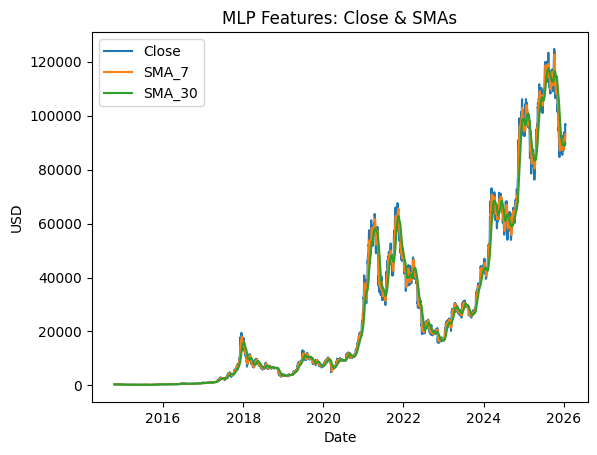

In [4]:
plt.figure()
plt.plot(df_feat.index, df_feat["Close"], label="Close")
plt.plot(df_feat.index, df_feat["SMA_7"], label="SMA_7")
plt.plot(df_feat.index, df_feat["SMA_30"], label="SMA_30")
plt.title("MLP Features: Close & SMAs")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()


## 4) Feature summary

In [5]:
features = ["Close", "SMA_7", "SMA_30", "Returns"] + (["Sentiment"] if ADD_SENTIMENT else [])
print("Features used:", features)
df_feat[features].describe().T


Features used: ['Close', 'SMA_7', 'SMA_30', 'Returns']


,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,4110.0,27273.471412,31869.192997,178.102997,3245.073425,10960.592285,42626.776367,124752.531250
SMA_7,,4110.0,27204.513315,31803.966842,204.545569,3119.281363,10863.714844,42637.032506,122781.400670
SMA_30,,4110.0,26952.565173,31587.726619,225.519800,2660.467234,10681.286117,42563.364811,117506.825000
Returns,,4110.0,0.001960,0.035094,-0.371695,-0.012324,0.001227,0.016028,0.252472


## 5) Notes
- SMAs provide trend information.
- Returns add momentum/volatility signal.
- This baseline is intentionally simple and stable for iteration.
